>[回声状态网络（Echo State Networks,ESN）详细](https://zhuanlan.zhihu.com/p/677489835)<br>
>[储备池、神经网络、回声状态网络（ESN）和液态机（LSM）](https://blog.csdn.net/qq_45452617/article/details/128593561)<br>
>[reservoirpy](https://github.com/reservoirpy/reservoirpy)<br>
>[液态状态机（Liquid State Machines, LSM）详细理解](https://blog.csdn.net/gaoxiaoxiao1209/article/details/142591209)<br>

储备池计算--这种方法的核心思想是只训练网络部分连接权,其余连接权一经产生就不再改变。储备池计算是一种适用于时间/顺序数据处理的计算框架。它派生自几个递归神经网络模型，包括回声状态网络和液态机。<br>

RC的主要特点是输入权重和储备池内循环连接的权重未经过训练，而只有读出权重  使用简单的学习算法（如线性回归）进行训练。与标准RNN相比，这种简单而快速的训练过程可以大大降低学习的计算成本。<br>

储备池在RC中的作用是非线性地将顺序输入转换为高维空间，以便通过简单的学习算法可以有效地读出输入的特征。<br>

从解决问题的思想角度考虑,储备池计算与以支持向量机为代表的核方法是相-致的，其最基本的思想都是将输入从低维空间映射到高维空间.在高维空间,利用处理线性问题的方法和理论去处理问题<br>

***储备池的优点：***<br>
储备池是固定的，只有读数是用简单的方法（如线性回归和分类）训练的，

与其他循环神经网络相比，储备池计算的主要优势是快速学习，导致训练成本低。

没有自适应更新的储液器适合使用各种物理系统、基板和设备的硬件实现


***ESN和LSM的共同点和区别：***<br>

这两种方法提出的角度不同，但是本质上都是对传统的RNNs训练算法的改进。即，都使用了RNNs的方案，神经元内部的连接权重是固定的，只有输出层的权重需要训练。这种简化训练的方案并没有因此降低系统的计算能力，却显著的提高了系统的运算效率。<br>

二者具有相同的解决问题的思想,即使用大规模随机稀疏网络(储备池)作为信息处理媒介,网络的训练过程只对部分神经元连接权进行,而其他连接权随机产生,并在网络训练过程中保持不变。<br>

***ESN模型：***<br>该模型使用由离散时间人工神经元组成的基于RNN的储备池。

储备池一般由 sigmoid 型神经元构成;

更关注于实际工程应用;

输出中使用线性回归或另一种简单的机器学习算法；

**LSM模型：**<br>提出的动机是解决时序信号的实时计算问题,应用的目标是神经微电路领域.

储备池则通常选取脉冲型神经元构建;

更侧重于模拟生物神经网络;

输出神经元中使用类似感知器的局部学习规则或基于突触可塑性的规则；

***ESNs***<br>
ESNs通过随机地布置大规模稀疏连接的模拟神经元构成随机网络结构,这个用于处理时序输入信号的随机的稀疏连接的大规模递归网络,被称为“储备池”。<br>

与传统的递归神经网络相比，ESNs最大的优势是简化了网络的训练过程,解决了传统递归神经网络结构难以确定、训练算法过于复杂的问题,同时也克服了递归网络存在的记忆渐消问题(ESNs的训练方法与传统的递归神经网络有本质不同).<br>

回声状态网络主要由输入层、隐含层和输出层组成。<br>

其特点是隐含层由一个包含大量神经元的动态储备池构成（以下简称储备池）。储备池内神经元采用随机、稀疏的连接方式，其蕴含了网络的运行状态，并具有短期记忆功能。由于储备池的连接权值矩阵随机生成，且生成后不再调整，大大简化了回声状态网络的训练过程。<br>

***LSMs***<br>
LSMs提出的动机是解决时序信号的实时计算问题,应用的目标是神经微电路(Neural Micro-circuit)领域.<br>

LSMs的目的是利用具有周期性连接的脉冲神经网络(SNNs)开发生物学相关学习模型。LSM中RNN的拓扑结构和连通性遵循生物神经网络的约束，具体来说，两个神经元连接的概率取决于它们位置之间的距离。这样的储备池通常被称为液体，LSM操作被称为液体计算，因为它类似于可激发介质，在外界刺激输入时表现出波纹。


## Liquid State Machines, LSM

[paper](https://igi-web.tugraz.at/people/maass/psfiles/130.pdf)

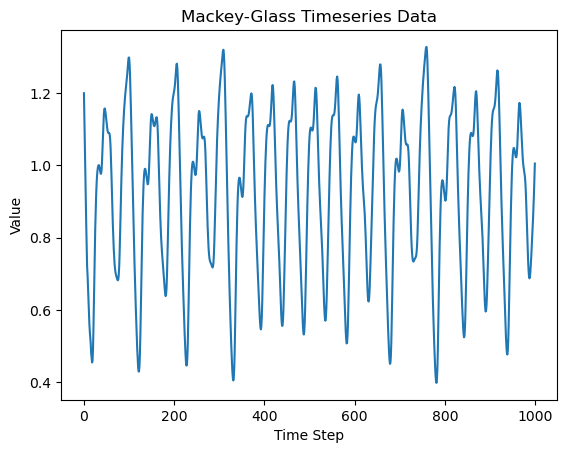

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from reservoirpy.nodes import Reservoir, Ridge 
from reservoirpy.datasets import mackey_glass 
 
# 加载Mackey-Glass数据集
data = mackey_glass(n_timesteps=1000, tau=17) 
 
# 可视化时间序列数据
plt.plot(data) 
plt.title("Mackey-Glass Timeseries Data") 
plt.xlabel("Time Step") 
plt.ylabel("Value") 
plt.show()

Running Model-0: 799it [00:00, 6722.11it/s]0<?, ?it/s]
Running Model-0: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


Fitting node Ridge-0...


Running Model-0: 199it [00:00, 5094.46it/s]           


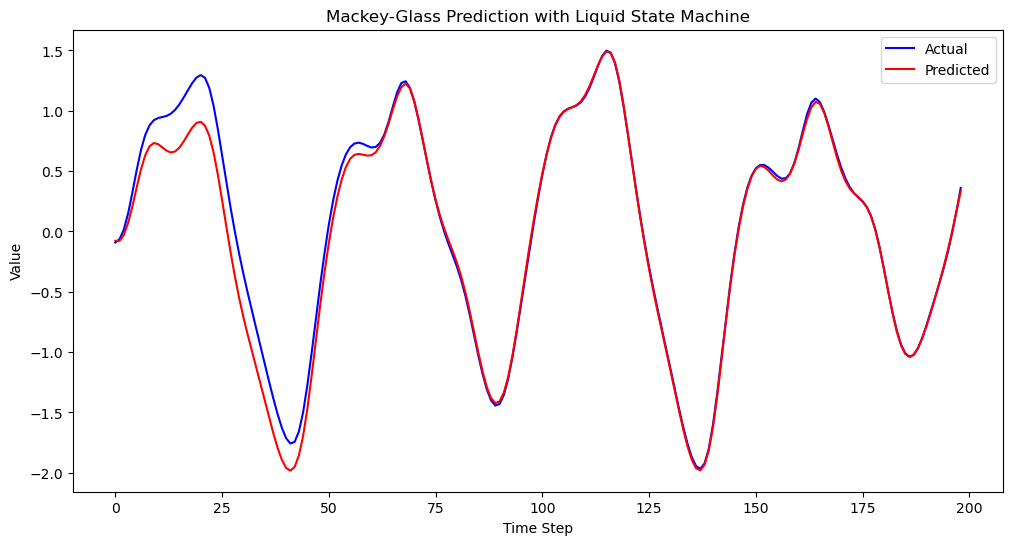

In [2]:
# 对数据进行归一化处理
data = (data - np.mean(data)) / np.std(data)
# 将数据集划分为训练集和测试集
split_ratio = 0.8 
split_idx = int(split_ratio * len(data)) 
train_data, test_data = data[:split_idx], data[split_idx:] 
# 构建并配置Liquid State Machine(储备池)
reservoir_size = 500  # 储备池中的神经元数量
# 创建储备池和读出层
reservoir = Reservoir(units=reservoir_size, lr=0.1, input_scaling=0.5, sr=0.9)  # 将'spectral_radius'参数简写为'sr'
readout = Ridge(ridge=1e-6)
# 连接各层,构建LSM模型
model = reservoir >> readout
# 调整数据形状以适应训练
X_train = train_data[:-1].reshape(-1, 1)  # 输入数据
y_train = train_data[1:]  # 目标数据(下一个时间步的值)
 
# 训练模型
model = model.fit(X_train, y_train, warmup=100)
# 生成预测结果
X_test = test_data[:-1].reshape(-1, 1) 
y_test = test_data[1:] 
predictions = model.run(X_test)
#绘制预测结果与真实测试数据的对比图
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color='b')
plt.plot(predictions, label="Predicted", color='r')
plt.title("Mackey-Glass Prediction with Liquid State Machine")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()

Running Reservoir-0: 100%|██████████| 799/799 [00:00<00:00, 10002.06it/s]


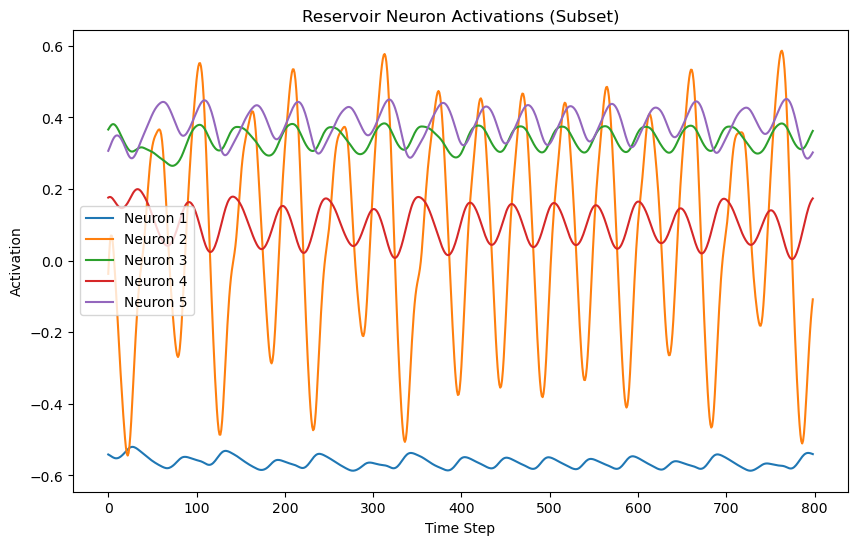

In [5]:
# 通过观察部分神经元的激活情况来分析储备池动力学
plt.figure(figsize=(10, 6)) 
states = reservoir.run(X_train) 
for i in range(5):  # 绘制前5个神经元的激活情况
    plt.plot(states[:, i], label=f"Neuron {i+1}") 
plt.title("Reservoir Neuron Activations (Subset)") 
plt.xlabel("Time Step") 
plt.ylabel("Activation") 
plt.legend() 
plt.show()

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
class SpikingNeuron:
    def __init__(self, threshold=1.0):
        self.potential = 0.0  # 神经元电位
        self.threshold = threshold  # 阈值
        self.spike = False  # 是否发射脉冲

    def update(self, input_current):
        self.potential += input_current  # 更新电位
        if self.potential >= self.threshold:
            self.spike = True  # 达到阈值，发射脉冲
            self.potential = 0.0  # 重置电位
        else:
            self.spike = False

    def get_output(self):
        return 1.0 if self.spike else 0.0
    
class LiquidStateMachine:
    def __init__(self, num_neurons, input_size):
        self.neurons = [SpikingNeuron() for _ in range(num_neurons)]
        self.input_weights = np.random.rand(num_neurons, input_size)  # 随机连接输入权重

    def step(self, input_signal):
        outputs = []
        for i, neuron in enumerate(self.neurons):
            input_current = np.dot(self.input_weights[i], input_signal)  # 计算输入电流
            neuron.update(input_current)
            outputs.append(neuron.get_output())
        return outputs

In [13]:
torch.randn(1000, 2)[0]

tensor([0.9095, 1.1530])

In [25]:
LiquidStateMachine(10,2).step(torch.randn(1000, 2)[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]

In [5]:
import pandas as pd
from torch.utils.data import TensorDataset,DataLoader

In [6]:
data = pd.read_csv("data\ETTh.csv")

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\26921\AppData\Local\Temp\ipykernel_41680\1029028916.py:1: SyntaxWarning: invalid escape sequence '\E'
  data = pd.read_csv("data\ETTh.csv")


In [7]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [ ]:
torch.randn(1000, 2)

In [ ]:
time_steps = 100
input_signal = np.sin(np.linspace(0, 4 * np.pi, time_steps))  # 正弦信号作为输入
lsm = LiquidStateMachine(num_neurons=10, input_size=1)
lsm_outputs = []

for t in range(time_steps):
    input_val = [input_signal[t]]  # 输入值
    output = lsm.step(input_val)  # 通过液态状态机
    lsm_outputs.append(output)

# 可视化LSM的输出
# plt.imshow(np.array(lsm_outputs).T, aspect='auto', cmap='gray')
# plt.title("Liquid State Machine Outputs")
# plt.xlabel("Time Step")
# plt.ylabel("Neuron Index")
# plt.show()

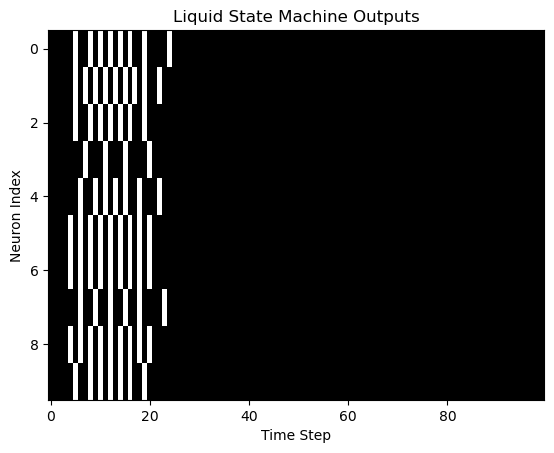

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义脉冲神经元类
class SpikingNeuron:
    def __init__(self, threshold=1.0):
        self.potential = 0.0  # 神经元电位
        self.threshold = threshold  # 阈值
        self.spike = False  # 是否发射脉冲
    
    def update(self, input_current):
        self.potential += input_current  # 更新电位
        if self.potential >= self.threshold:
            self.spike = True  # 达到阈值，发射脉冲
            self.potential = 0.0  # 重置电位
        else:
            self.spike = False
    
    def get_output(self):
        return 1.0 if self.spike else 0.0

# 定义液态状态机类
class LiquidStateMachine:
    def __init__(self, num_neurons, input_size):
        self.neurons = [SpikingNeuron() for _ in range(num_neurons)]
        self.input_weights = np.random.rand(num_neurons, input_size)  # 随机连接输入权重
    
    def step(self, input_signal):
        outputs = []
        for i, neuron in enumerate(self.neurons):
            input_current = np.dot(self.input_weights[i], input_signal)  # 计算输入电流
            neuron.update(input_current)
            outputs.append(neuron.get_output())
        return outputs

# 模拟输入信号
time_steps = 100
input_signal = np.sin(np.linspace(0, 4 * np.pi, time_steps))  # 正弦信号作为输入

# 初始化LSM
lsm = LiquidStateMachine(num_neurons=10, input_size=1)

# 存储神经元输出
lsm_outputs = []

# 模拟过程
for t in range(time_steps):
    input_val = [input_signal[t]]  # 输入值
    output = lsm.step(input_val)  # 通过液态状态机
    lsm_outputs.append(output)

# 可视化LSM的输出
plt.imshow(np.array(lsm_outputs).T, aspect='auto', cmap='gray')
plt.title("Liquid State Machine Outputs")
plt.xlabel("Time Step")
plt.ylabel("Neuron Index")
plt.show()


## Echo State Networks,ESN

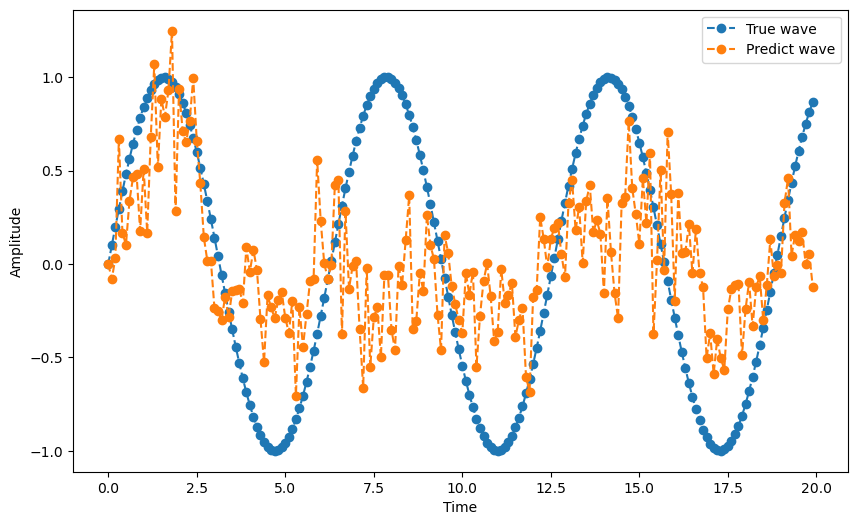

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 不考虑储层的大小、频谱半径、输入缩放以及储存库神经元激活函数
class EchoStateNetwork_1:
    def __init__(self, reservoir_size, spectral_radius=0.9):
        # 初始化网络参数
        self.reservoir_size = reservoir_size

        # 储层权重
        self.W_res = np.random.rand(reservoir_size, reservoir_size) - 0.5
        self.W_res *= spectral_radius / \
            np.max(np.abs(np.linalg.eigvals(self.W_res)))

        # 输入权重
        self.W_in = np.random.rand(reservoir_size, 1) - 0.5

        # 输出权重（待训练）
        self.W_out = None

    def train(self, input_data, target_data):
        # 使用伪逆训练输出权重
        self.W_out = np.dot(np.linalg.pinv(self.run_reservoir(input_data)), target_data)

    def predict(self, input_data):
        # 使用训练好的输出权重进行预测
        return np.dot(self.run_reservoir(input_data), self.W_out)

    def run_reservoir(self, input_data):
        # 初始化储层状态
        reservoir_states = np.zeros((len(input_data), self.reservoir_size))

        # 运行储层
        for t in range(1, len(input_data)):
            reservoir_states[t, :] = np.tanh(
                np.dot(
                    self.W_res, reservoir_states[t - 1, :]) + np.dot(self.W_in, input_data[t])
            )

        return reservoir_states


# 考虑储层的大小、频谱半径、输入缩放以及储存库神经元激活函数
class EchoStateNetwork_2:
    def __init__(self, reservoir_size, spectral_radius=0.9, leaking_rate=0.3, input_scaling=1.0, activation_function=np.tanh):
        # 初始化网络参数
        self.reservoir_size = reservoir_size
        self.spectral_radius = spectral_radius
        self.leaking_rate = leaking_rate
        self.input_scaling = input_scaling
        self.activation_function = activation_function

        # 储层权重
        self.W_res = np.random.rand(reservoir_size, reservoir_size) - 0.5
        self.W_res *= spectral_radius / np.max(np.abs(np.linalg.eigvals(self.W_res)))

        # 输入权重
        self.W_in = np.random.rand(reservoir_size, 1) - 0.5
        self.W_in *= input_scaling

        # 输出权重 (待训练)
        self.W_out = None

    def train(self, input_data, target_data):
        # 运行储层状态
        reservoir_states = self.run_reservoir(input_data)

        # 使用递归最小二乘法训练输出权重
        self.W_out = np.dot(np.linalg.pinv(reservoir_states), target_data)

    def predict(self, input_data):
        # 运行储层状态
        reservoir_states = self.run_reservoir(input_data)

        # 使用训练好的输出权重进行预测
        predictions = np.dot(reservoir_states, self.W_out)

        return predictions

    def run_reservoir(self, input_data):
        # 初始化储层状态
        reservoir_states = np.zeros((len(input_data), self.reservoir_size))

        # 运行储层
        for t in range(1, len(input_data)):
            reservoir_states[t, :] = (1 - self.leaking_rate) * reservoir_states[t - 1, :] + \
                                     self.leaking_rate * self.activation_function(
                                         np.dot(self.W_res, reservoir_states[t - 1, :]) +
                                         np.dot(self.W_in, input_data[t])
                                     )

        return reservoir_states
# 生成合成数据（输入：随机噪音，目标：正弦波）
time = np.arange(0, 20, 0.1)
noise = 0.1 * np.random.rand(len(time))
sine_wave_target = np.sin(time)

# 创建Echo State网络
reservoir_size = 50
spectral_radius = 0.9
leaking_rate = 0.3
input_scaling = 1.0
activation_function = np.tanh

# 两种ESN，二选一
# 第一种ESN
esn = EchoStateNetwork_1(reservoir_size)

# 第二种ESN：考虑超参数：储层的大小、频谱半径、输入缩放以及储存库神经元激活函数
# esn = EchoStateNetwork_2(reservoir_size, spectral_radius, leaking_rate, input_scaling, activation_function)

# 准备训练数据
training_input = noise[:, None]
training_target = sine_wave_target[:, None]

# 训练ESN
esn.train(training_input, training_target)

# 生成测试数据（为简单起见与训练数据相似）
test_input = noise[:, None]

# 进行预测
predictions = esn.predict(test_input)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(time, sine_wave_target, label='True wave',
         linestyle='--', marker='o')
plt.plot(time, predictions, label='Predict wave', linestyle='--', marker='o')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()